In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import os

In [2]:
db = pd.read_csv('abalone.csv') 

In [3]:
db.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
db.shape

(4177, 9)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
db.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Exploratory data analysis

In [7]:
db.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### check and remove skewness from dataset by using feature transformation

In [8]:
db.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [9]:
db.kurtosis()

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64

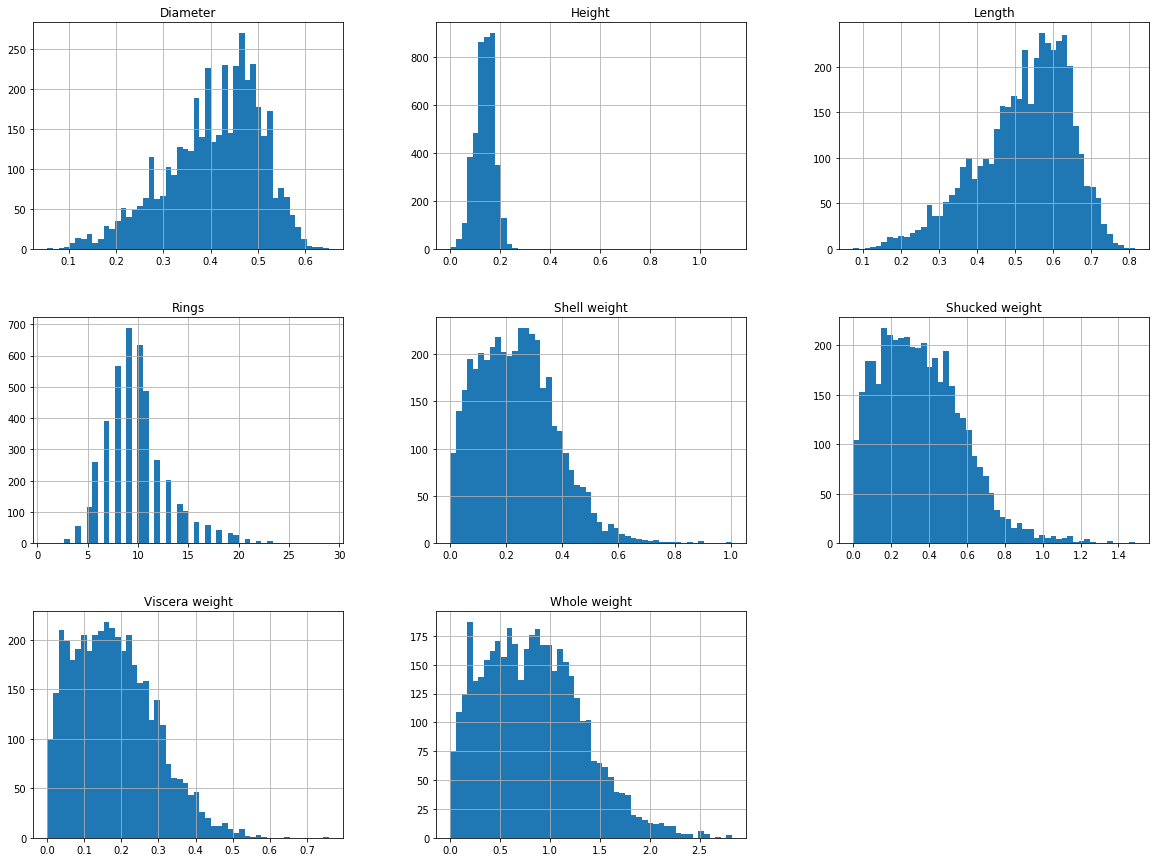

In [10]:
db.dropna().hist(bins=50,figsize=(20,15))
plt.show()

from above fig we can see that there is one feature is suffering from right skew.

Text(0.5, 0, 'sq_root-Height')

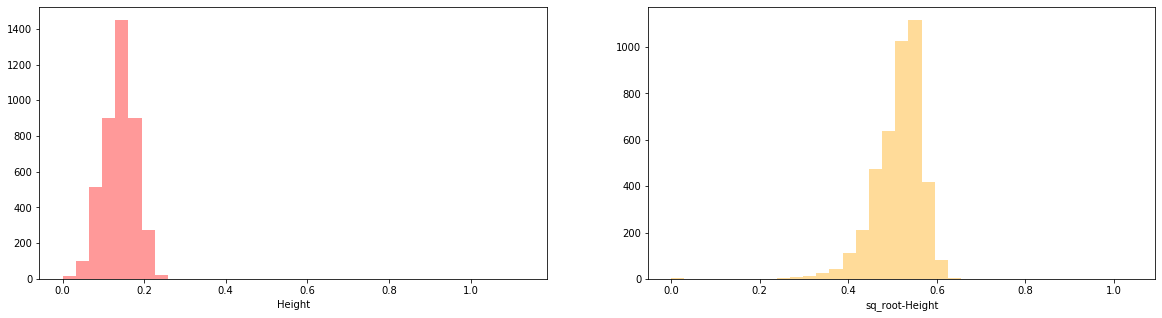

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.Height.dropna(), ax=ax[0], bins=35,kde=False, color="red")
sns.distplot(np.cbrt(db.Height.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("sq_root-Height")

In [12]:
print('Skewness: %f' % np.sqrt(db.Height.dropna().skew()))
print('Kurtsis: %f' % np.sqrt(db.Height.dropna().kurt()))

Skewness: 1.768846
Kurtsis: 8.719261


# Bivariate Analysis
Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features.

<Figure size 1008x720 with 0 Axes>

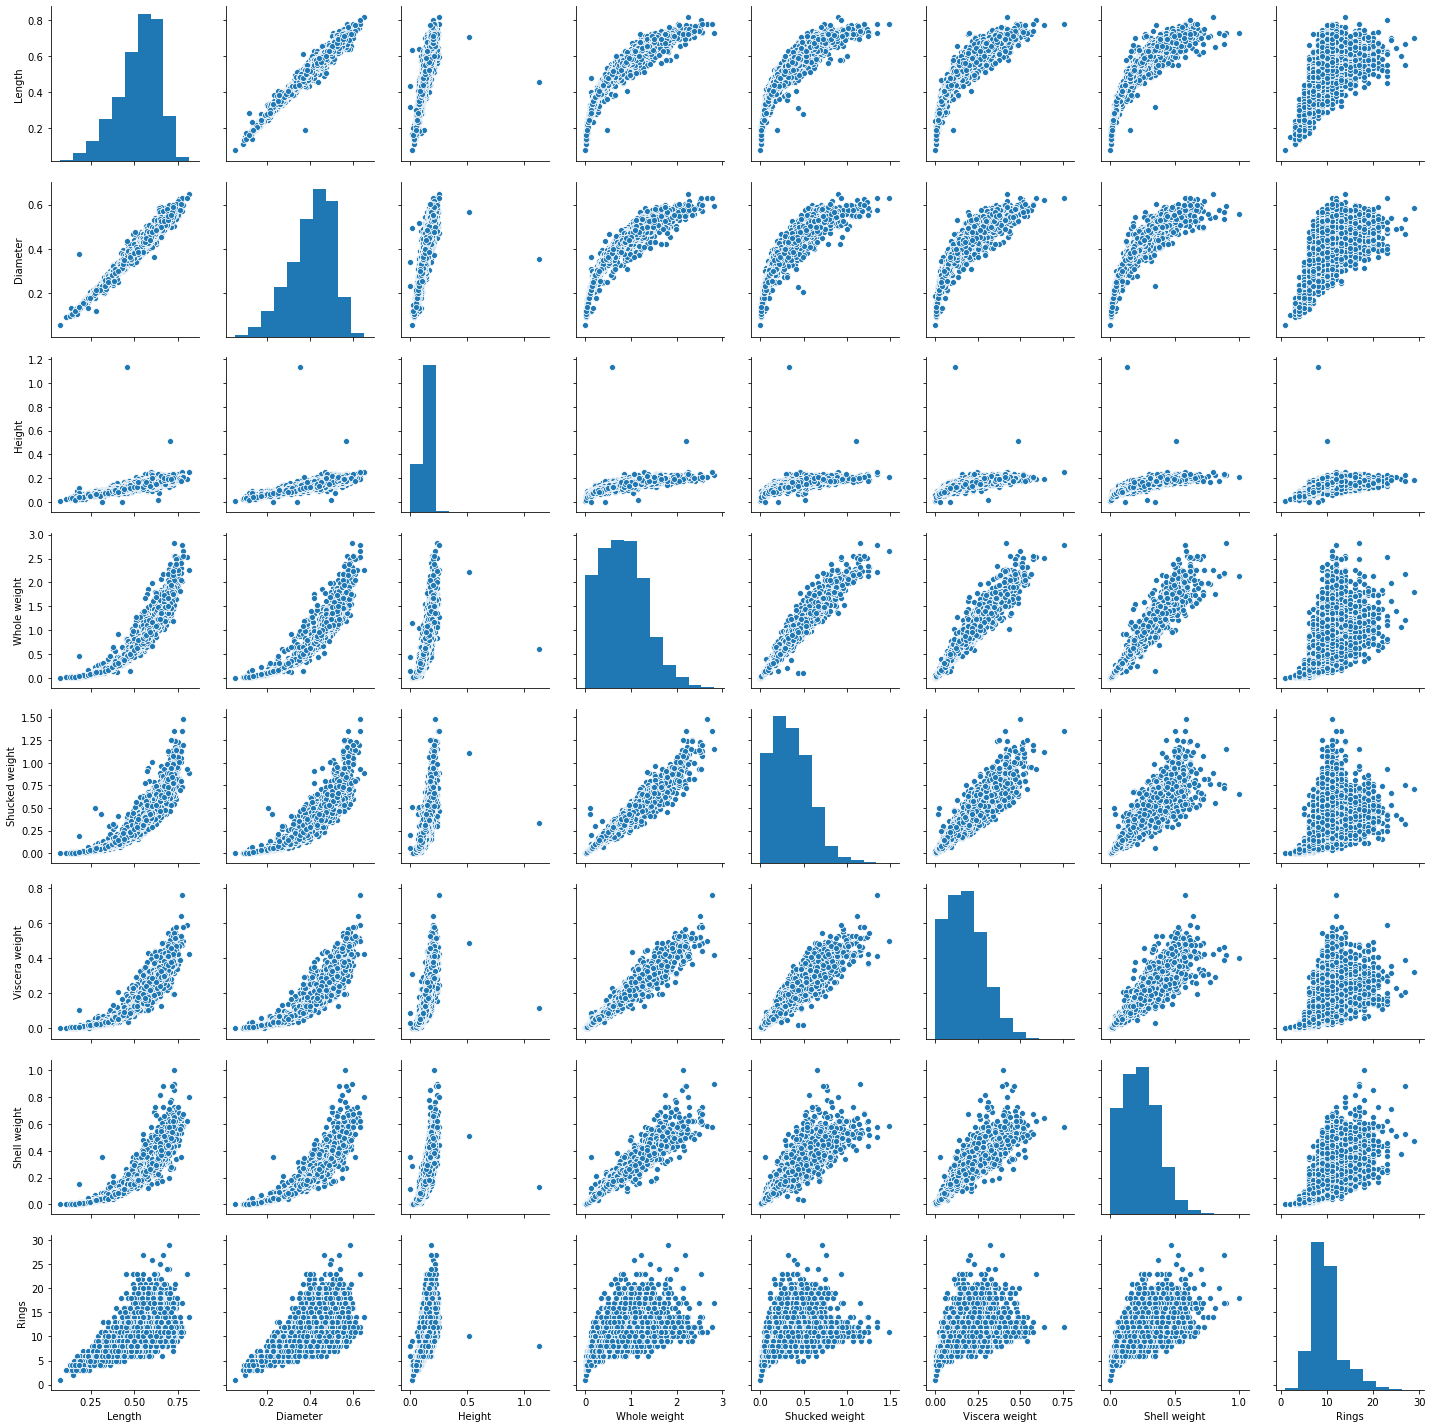

In [13]:
plt.figure(figsize=(14,10))
sns.pairplot(db) 

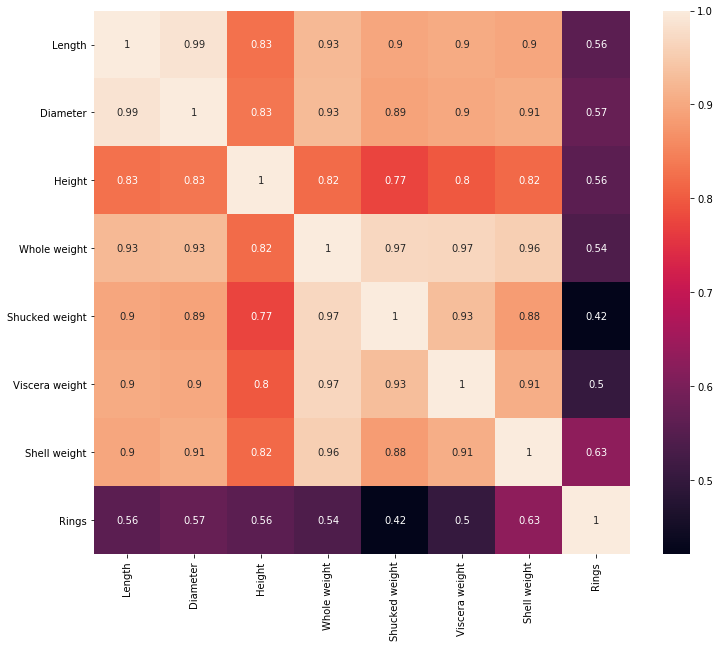

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(db.corr(), annot=True)

In [15]:
db.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


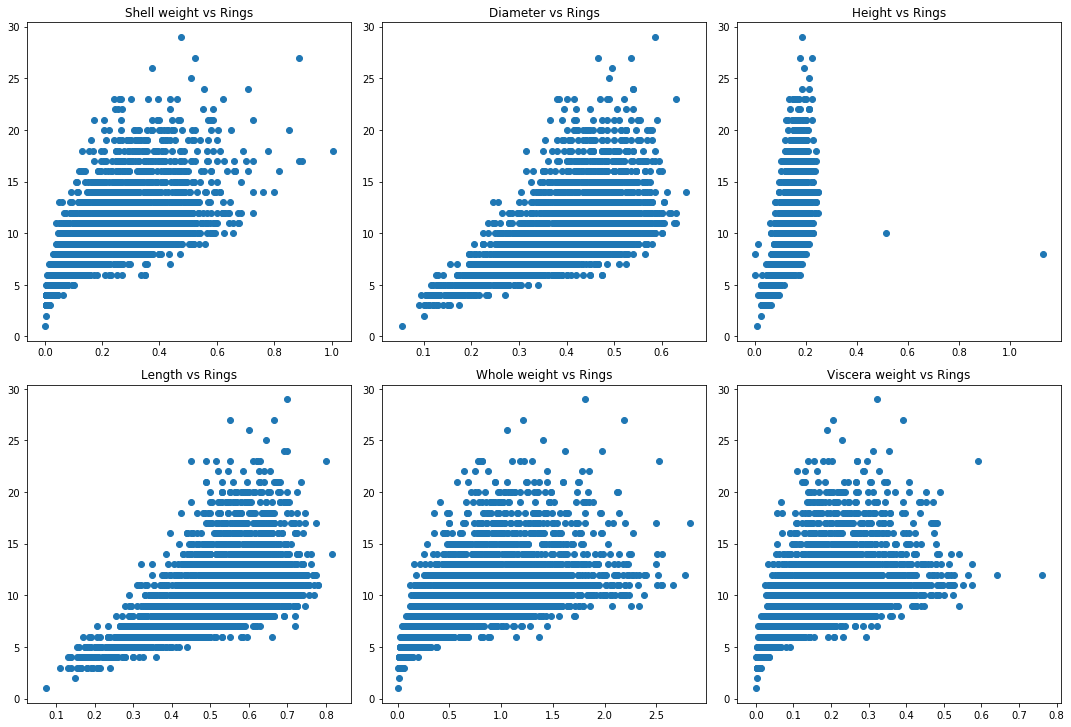

In [16]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(db['Shell weight'],db['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(db['Diameter'],db['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(db['Height'],db['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(db['Length'],db['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(db['Whole weight'],db['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(db['Viscera weight'],db['Rings'])

plt.tight_layout()

In [17]:
# As we can see that the data we have predicting the Rings between 3 to 15 years.

new_db = db[db.Rings < 20]
new_db = new_db[new_db.Rings > 2]

In [18]:
new_db.Rings.unique()

array([15,  7,  9, 10,  8, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 17,  3],
      dtype=int64)

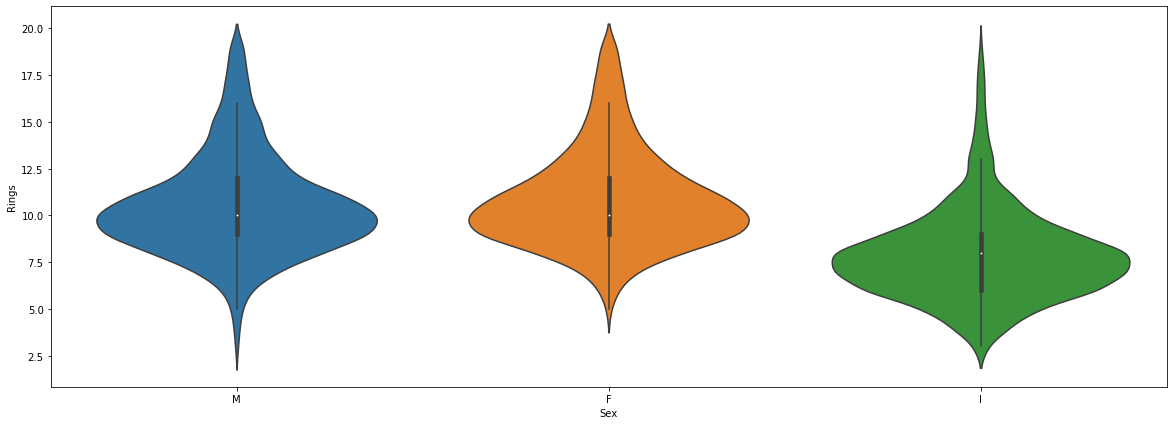

In [19]:
plt.figure(figsize = (20,7))
sns.violinplot(x = 'Sex', y = 'Rings', data = new_db)

Male : age majority lies in between 7.5 years to 19 years
Female: age majority lies in between 8 years to 19 years
Immature: age majority lies in between 6 years to < 10 years

# Outliers treatment

In [20]:
#new_db = pd.get_dummies(new_db)
from sklearn.preprocessing import LabelEncoder
new_db['Sex'] = LabelEncoder().fit_transform(new_db['Sex'].tolist())
#dummy_data = new_db.copy()

In [21]:
new_db.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
new_db.Rings.unique()

array([15,  7,  9, 10,  8, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 17,  3],
      dtype=int64)

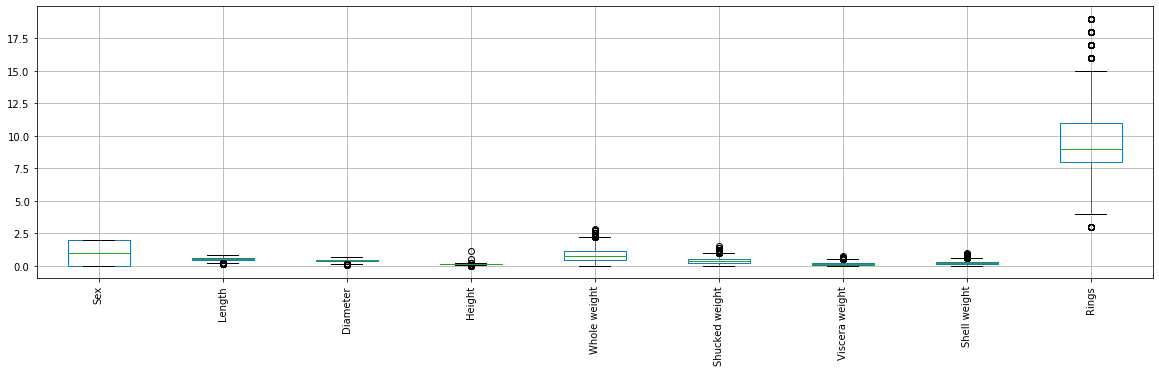

In [23]:
new_db.boxplot( rot = 90, figsize=(20,5))

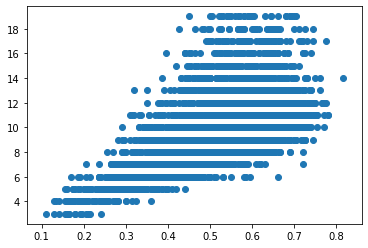

In [24]:
plt.scatter(x = new_db['Length'], y = new_db['Rings'],)

In [25]:
# outliers removal
new_db.drop(new_db[(new_db['Length']<0.1) & (new_db['Rings'] < 5)].index, inplace=True)
new_db.drop(new_db[(new_db['Length']>=0.8) & (new_db['Rings']< 20)].index, inplace=True)

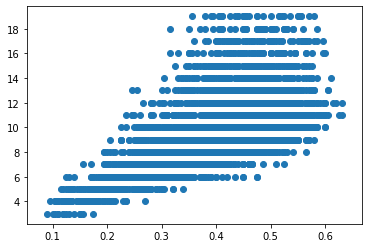

In [26]:
plt.scatter(x = new_db['Diameter'], y = new_db['Rings'],)

In [27]:
# outliers removal
new_db.drop(new_db[(new_db['Diameter']<0.1) & (new_db['Rings'] < 5)].index, inplace=True)
new_db.drop(new_db[(new_db['Diameter']<0.6) & (new_db['Rings'] > 18)].index, inplace=True)
new_db.drop(new_db[(new_db['Diameter']>=0.6) & (new_db['Rings']< 18)].index, inplace=True)

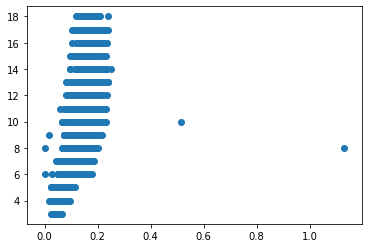

In [28]:
plt.scatter(x = new_db['Height'], y = new_db['Rings'],)

In [29]:
# outliers removal
new_db.drop(new_db[(new_db['Height']>0.4) & (new_db['Rings'] < 15)].index, inplace=True)
new_db.drop(new_db[(new_db['Height']<0.4) & (new_db['Rings'] > 25)].index, inplace=True)

# Preprocessing, Modeling, Evaluation
The base steps followed in any data modeling pipelines are:

           - pre-processing 
           - suitable model selection
           - modeling
           - hyperparamaters tunning using cross validation technique
           - evaluation

In [30]:
X = new_db.drop('Rings', axis = 1)
X['Height'] = np.sqrt(db.Height)
y = new_db['Rings']

In [31]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.055


In [32]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
new_db.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [34]:
X.shape,y.shape

((4059, 8), (4059,))

In [35]:
# from sklearn.preprocessing import StandardScaler
# standardScale = StandardScaler()
# standardScale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state =45)

In [36]:
model = linear_model.LinearRegression()
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
r2_score(y_train,lr_model.predict(X_train))

0.5285976533629486

In [37]:
r2_score(y_test,lr_model.predict(X_test))

0.5316982267881085

### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [144]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_MSE = mean_squared_error(y_test, y_pred)
    train_MSE = mean_squared_error(y_train, train_y_pred)
    test_r2 = r2_score(y_test,y_pred)
    train_r2 = r2_score(y_train,train_y_pred)
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_MSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_MSE) 
    
    print("\n The train_r2_score across ALL models:\n",
          train_r2)
                                    
    print("\n The test_r2_score across ALL models:\n",
          test_r2) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=500, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.2, tree_method=None,
       validate_parameters=False, verbosity=None)

 The best score across ALL searched params:
 0.550546726604014

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}

 The train_RMSE across ALL models:
 2.789895742235075

 The test_RMSE across ALL 

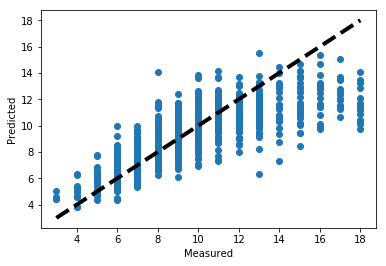

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.5472438093748452

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

 The train_RMSE across ALL models:
 2.58922520343113

 The test_RMSE across ALL models:
 3.5633205050204877


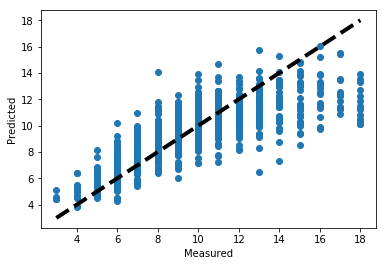

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.5394893299795307

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 1000, 'random_state': 50}

 The train_RMSE across ALL models:
 1.9787742007414288

 The test_RMSE across ALL models:
 3.554757116122998

 The train_r2_score across ALL models:
 0.7388412534284112

 The test_r2_score across ALL models:
 0.576333383854599


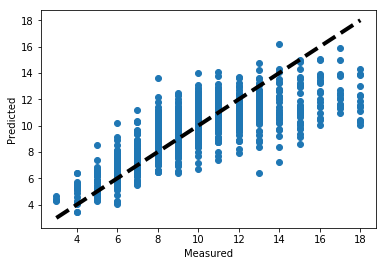

None



In [145]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                          
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

#### bar plot of features importances

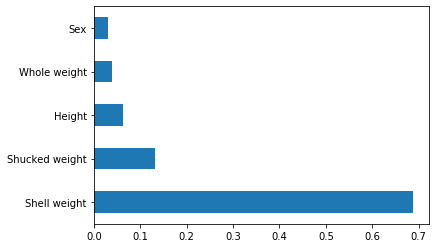

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

#### here,'Shell weight' features is important for model.

## save model

In [39]:
import pickle

In [40]:
filename='abalone_GradientBoostingRegressor_model.sav'

In [41]:
pickle.dump(model, open(filename, 'wb'))

In [42]:
load_lr_model =pickle.load(open(filename, 'rb'))